### 实验8：决策树

#### 一：实验目的和要求
1．掌握sklearn构建决策树模型的方法<br>
2．掌握ID3算法的详细过程<br>

#### 二：内容和方法
- 针对给出的泰坦尼克号生还数据：<br>
    1. 用sklearn中的决策树算法进行分类，并预测pclass=3，sex=female, age=15这个乘客是否生还。<br>
    2. 用ID3算法计算出全体数据的经验熵 H(D)，和第一个层次利用每个属性进行分类的条件熵H(D|A)，然后计算每个属性下的信息增益，以决定利用哪一个属性进行分类。

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as DTC, export_graphviz
import numpy as np

In [2]:
data = pd.read_excel('D://root/Desktop/各科/kk/决策树/7_titainc_data.xlsm', encoding='utf-8')
data.drop(['PassengerId'], axis=1, inplace=True)    # 舍弃ID列，不适合作为特征
data.drop

<bound method DataFrame.drop of      Survived  Pclass     Sex   Age
0           0       3    male  22.0
1           1       1  female  38.0
2           1       3  female  26.0
3           1       1  female  35.0
4           0       3    male  35.0
..        ...     ...     ...   ...
886         0       2    male  27.0
887         1       1  female  19.0
888         0       3  female   NaN
889         1       1    male  26.0
890         0       3    male  32.0

[891 rows x 4 columns]>

In [3]:
# 数据是类别标签，将其转换为数，用1表示男，0表示女。
data.loc[data['Sex'] == 'male', 'Sex'] = 1
data.loc[data['Sex'] == 'female', 'Sex'] = 0

In [4]:
data.fillna(int(data.Age.mean()), inplace=True)
print(data.head(5))   # 查看数据

   Survived  Pclass  Sex   Age
0         0       3    1  22.0
1         1       1    0  38.0
2         1       3    0  26.0
3         1       1    0  35.0
4         0       3    1  35.0


In [5]:
X = data.iloc[:, 1:4]
y = data.iloc[:, 0]

In [6]:
dtc = DTC(criterion='entropy')    # 初始化决策树对象，基于信息熵
dtc.fit(X, y)    # 训练模型
print('输出准确率：', dtc.score(X,y))

输出准确率： 0.8787878787878788


In [7]:
with open('tree.dot', 'w') as f:
    f = export_graphviz(dtc, feature_names=X.columns, out_file=f)

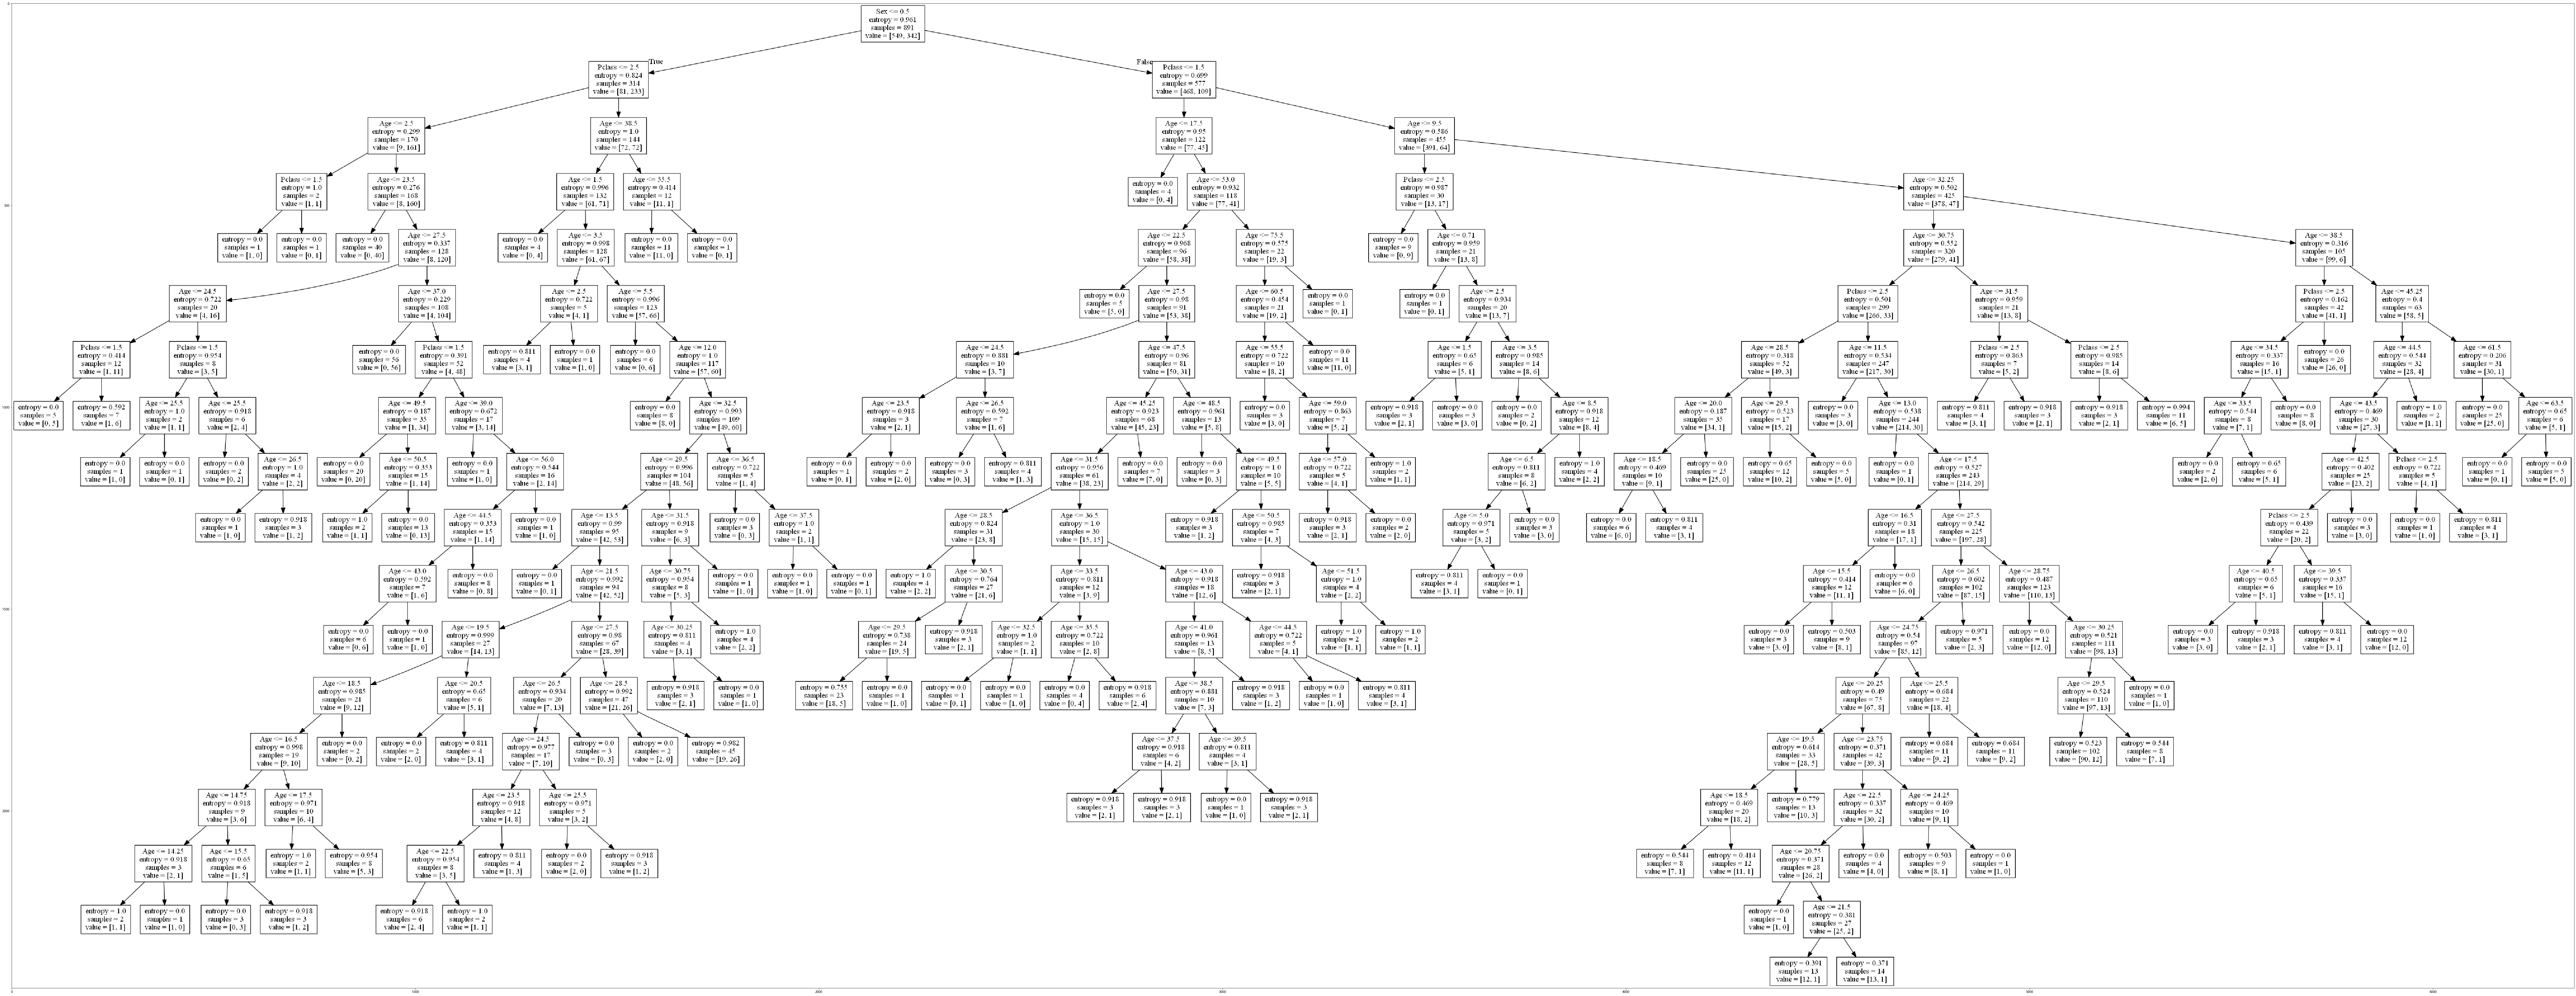

In [15]:
import matplotlib.pyplot as plt
import cv2
pirate = plt.imread(r'C://Users//hhr//taidi//决策树/tree.png')
plt.figure(1,figsize=(150,100))
plt.imshow(pirate)

In [9]:
#1. 预测pclass=3，sex=female, age=15这个乘客是否生还。
isSurvived = '生还' if dtc.predict(pd.DataFrame({
    'Pclass':[3],
    'Sex':[0],
    'Age':[15]
}))[0] == 1 else '不生还'

isSurvived

'生还'

In [10]:
# 信息熵
def calc_ent(x):
    x_value_list = np.unique(x)
    ent = 0.0
    for x_value in x_value_list:
        p = float(x[x == x_value].shape[0]) / x.shape[0]
        logp = np.log2(p)
        ent -= p * logp

    return ent

# 条件信息熵
def calc_condition_ent(x, y):
    # calc ent(y|x)
    x_value_list = np.unique(x)
    ent = 0.0
    for x_value in x_value_list:
        sub_y = y[x == x_value]
        temp_ent = calc_ent(sub_y)
        ent += (float(sub_y.shape[0]) / y.shape[0]) * temp_ent

    return ent

# 信息增益
def calc_ent_grap(x,y):
    base_ent = calc_ent(y)
    condition_ent = calc_condition_ent(x, y)
    ent_grap = base_ent - condition_ent

    return ent_grap

In [11]:
#2.用ID3算法计算出全体数据的经验熵 H(D)，和第一个层次利用每个属性进行分类的条件熵H(D|A)，然后计算每个属性下的信息增益，以决定利用哪一个属性进行分类。

#计算HD
HD = calc_ent(y)
print(HD)

0.9607079018756469


In [12]:
#计算条件熵
hda1 = calc_condition_ent(X['Pclass'][:], y)
hda2 = calc_condition_ent(X['Sex'][:], y)
hda3 = calc_condition_ent(X['Age'][:], y)

print(hda1,hda2,hda3)

0.8768768565796353 0.7430477952150327 0.853307200677544


In [13]:
g1 = calc_ent_grap(X['Pclass'][:],y)
g2 = calc_ent_grap(X['Sex'][:],y)
g3 = calc_ent_grap(X['Age'][:],y)
print(g1,g2,g3)

0.0838310452960116 0.2176601066606142 0.10740070119810297
